## **Практическое занятие №3**

### **Моделирование случайных процессов, имеющих заданные законы распределения. Моделирование нормального закона распределения.**

***Цель работы:***
Изучение методов генерации случайных величин с заданным законом 
распределения. Моделирование нормального закона распределения. 
Исследование зависимости средней квадратичной погрешности между 
смоделированным экспериментальным распределением и теоретическим от 
числа экспериментов. 

### Задание №1


Создать функцию, описывающую распределение плотности вероятности для нормального закона распределения случайной величины.
Построить графики плотности вероятности нормального закона с заданными значениями математического ожидания М и среднеквадратического отклонения о : М = 10 и о = 2, М = 10 и о = 1, М =10 и о = 1/2 
M = 12 и о = 1.

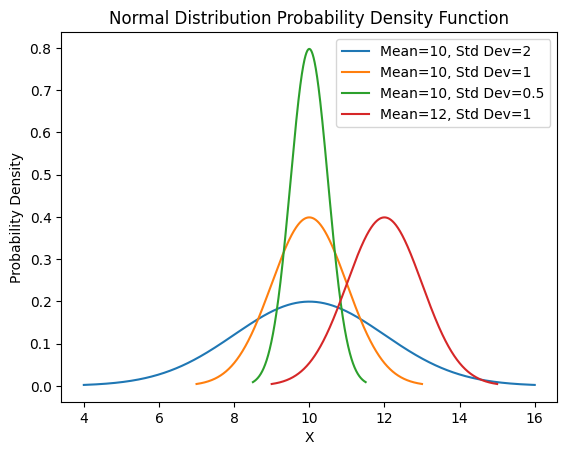

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def plot_normal_distribution(mu, sigma):
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 1000)
    y = norm.pdf(x, mu, sigma)
    
    plt.plot(x, y, label=f'Mean={mu}, Std Dev={sigma}')
    plt.xlabel('X')
    plt.ylabel('Probability Density')
    plt.title('Normal Distribution Probability Density Function')
    plt.legend()

mu_values = [10, 10, 10, 12]
sigma_values = [2, 1, 0.5, 1]

for mu, sigma in zip(mu_values, sigma_values):
    plot_normal_distribution(mu, sigma)

plt.show()


### Задание №2

Описать
функцию
распределения
для нормального
закона с параметрами М = 10 и о = 2 и построить ее график на интервале от 0 до 20

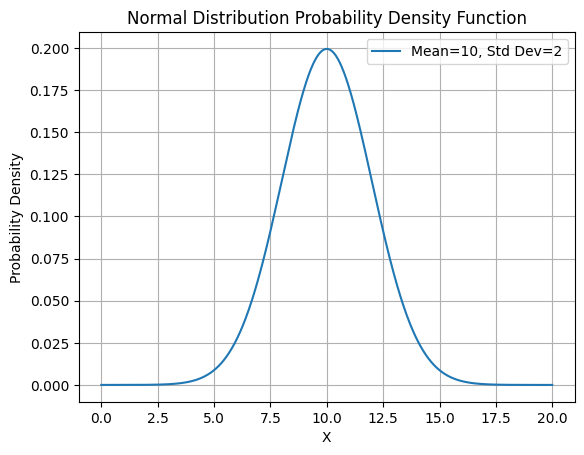

In [4]:
mu = 10
sigma = 2

x = np.linspace(0, 20, 1000)
y = norm.pdf(x, mu, sigma)

plt.plot(x, y, label=f'Mean={mu}, Std Dev={sigma}')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.title('Normal Distribution Probability Density Function')
plt.legend()
plt.grid(True)
plt.show()


### Задание №3

Для полученной функции распределения (см. задание 2) провести моделирование нормального закона распределения с помощью метода обратной функции. Для моделирования равномерно распределенной случайной величины использовать встроенный генератор случайных чисел
MathCAD (функция rnd). Для представления обратной функции использовать кусочно-линейную аппроксимацию для 100 равномерных участков на интервале от 0 до 20. Число экспериментов для моделирования принять равным N = 10^3,10^4,10^5,10^6.

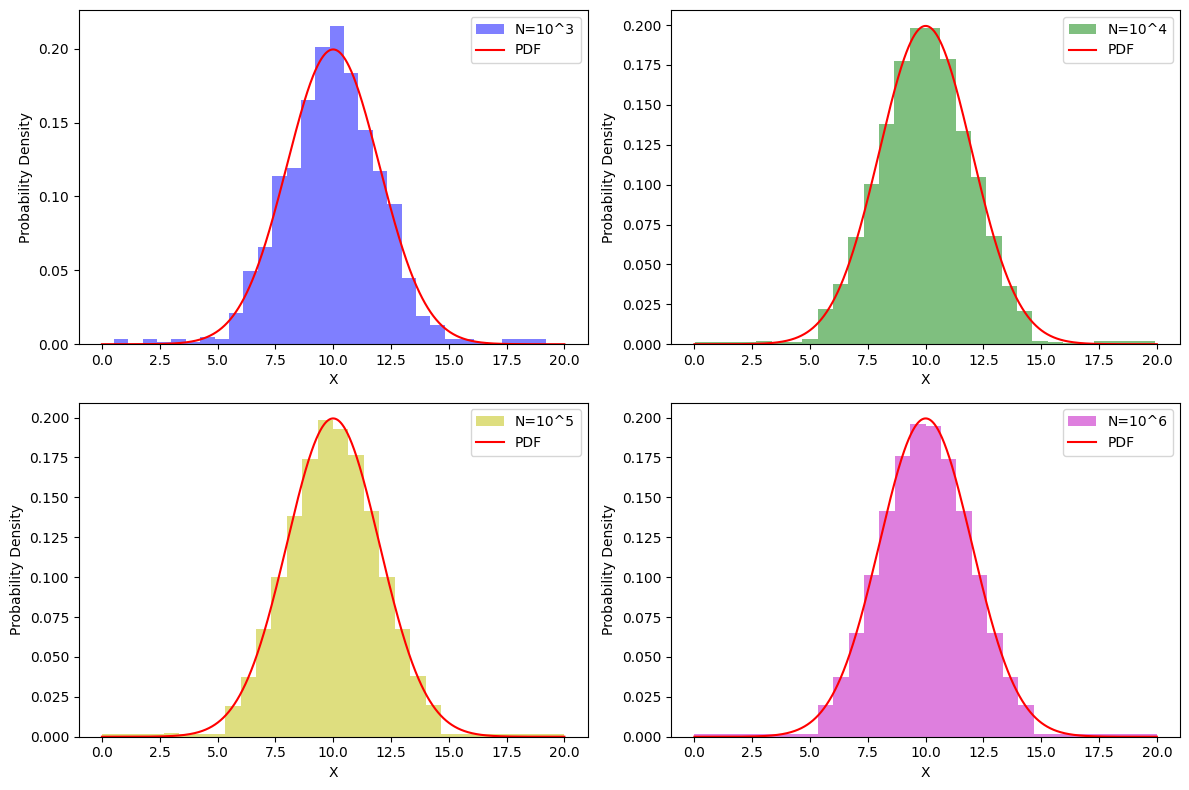

In [5]:
mu = 10
sigma = 2

x = np.linspace(0, 20, 1000)
pdf = norm.pdf(x, mu, sigma)
cdf = norm.cdf(x, mu, sigma)
num_intervals = 100
intervals = np.linspace(0, 1, num_intervals + 1)
approximated_cdf = np.interp(intervals, cdf, x)
N_values = [10**3, 10**4, 10**5, 10**6]
generated_random_numbers = {}

for N in N_values:
    random_uniform_numbers = np.random.rand(N)
    generated_normal_numbers = np.interp(random_uniform_numbers, intervals, approximated_cdf)
    generated_random_numbers[N] = generated_normal_numbers

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.hist(generated_random_numbers[10**3], bins=30, density=True, alpha=0.5, color='b', label='N=10^3')
plt.plot(x, pdf, 'r', label='PDF')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.legend()

plt.subplot(2, 2, 2)
plt.hist(generated_random_numbers[10**4], bins=30, density=True, alpha=0.5, color='g', label='N=10^4')
plt.plot(x, pdf, 'r', label='PDF')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.legend()

plt.subplot(2, 2, 3)
plt.hist(generated_random_numbers[10**5], bins=30, density=True, alpha=0.5, color='y', label='N=10^5')
plt.plot(x, pdf, 'r', label='PDF')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.legend()

plt.subplot(2, 2, 4)
plt.hist(generated_random_numbers[10**6], bins=30, density=True, alpha=0.5, color='m', label='N=10^6')
plt.plot(x, pdf, 'r', label='PDF')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.legend()

plt.tight_layout()
plt.show()

### Задание №4

Построить гистограммы относительных частот
Для полученной
последовательности случайных чисел на 100 интервалах и для числа экспериментов N = 10^3,10^4,10^5,10^6.

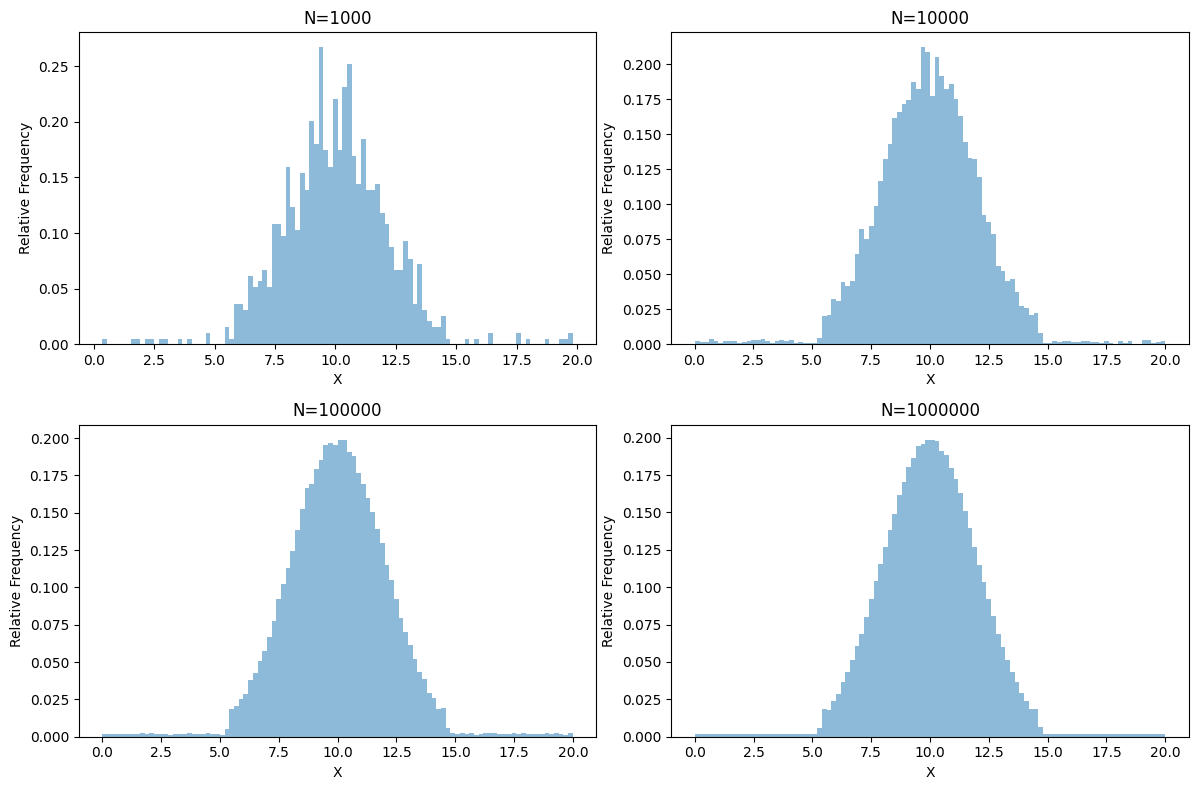

In [6]:
num_intervals = 100
N_values = [10**3, 10**4, 10**5, 10**6]

subtitles = [f'N={N}' for N in N_values]

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.subplots_adjust(hspace=0.5)
axs = axs.ravel()

for i, N in enumerate(N_values):
    random_uniform_numbers = np.random.rand(N)
    generated_normal_numbers = np.interp(random_uniform_numbers, intervals, approximated_cdf)
    hist, bins = np.histogram(generated_normal_numbers, bins=num_intervals, density=True)
    bin_centers = (bins[:-1] + bins[1:]) / 2
    width = bins[1] - bins[0]
    axs[i].bar(bin_centers, hist, width=width, alpha=0.5)
    axs[i].set_title(subtitles[i])
    axs[i].set_xlabel('X')
    axs[i].set_ylabel('Relative Frequency')

plt.tight_layout()
plt.show()


### Задание №5

Рассчитать среднюю квадратичную погрешность между полученным
экспериментальным распределением и
теоретическим для числа
экспериментов N = 10^3,10^4,10^5,10^6. Построить график зависимости средней квадратичной погрешности от числа экспериментов.

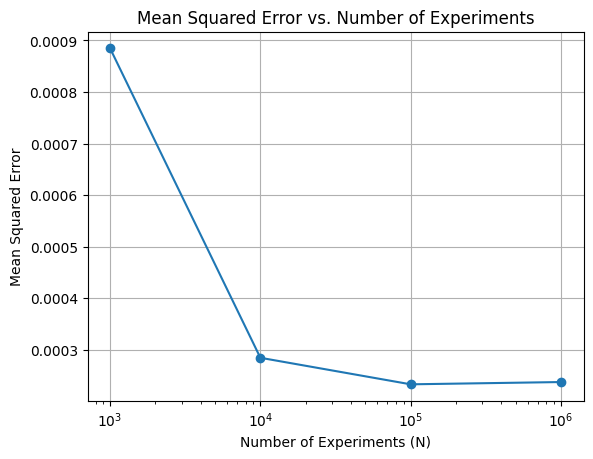

In [15]:
import numpy as np

num_intervals = 100
N_values = [10**3, 10**4, 10**5, 10**6]
mean_squared_errors = []

intervals = np.linspace(0, 1, num_intervals + 1)
approximated_cdf = np.interp(intervals, cdf, x)
pdf_theoretical = norm.pdf(bin_centers, mu, sigma)

for N in N_values:
    random_uniform_numbers = np.random.rand(N)
    generated_normal_numbers = np.interp(random_uniform_numbers, intervals, approximated_cdf)
    
    hist, _ = np.histogram(generated_normal_numbers, bins=num_intervals, density=True)
    pdf_theoretical = pdf_theoretical[:len(hist)]
    
    squared_error = np.square(hist - pdf_theoretical)
    mean_squared_error = np.mean(squared_error)
    mean_squared_errors.append(mean_squared_error)

plt.plot(N_values, mean_squared_errors, marker='o')
plt.xlabel('Number of Experiments (N)')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error vs. Number of Experiments')
plt.xscale('log')  # Логарифмическая шкала по оси X
plt.grid(True)
plt.show()
